Autora: Helena Boin Gaidys



# Exercício 02: Análise de Fake News (0,5 pontos na média)
Pergunta de negócio:
* Existem padrões notícias brasileiras que nos permitem suspeitar de fake news?

Na base de dados __FakeBR Corpus__, disponível em `data/fakenews/full_texts`, extraída de  https://sites.google.com/icmc.usp.br/opinando/, existem duas pastas que separam conjuntos distintos de notícias:
* `fake`: com notícias sabidamente falsas;
* `true`: com notícias sabidamente verdadeiras.

Utilizando o spark:
* Conte frequência de cada palavra em relação ao total de palavras da base;
* Separe as 100 palavras com maior frequência de cada base.

Na sequencia:
* Calcule a diferença entre as frequências relativas das 100 palavras mais frequentes entre base `fake` e `true`;
* Faça um gráfico desta diferença e analise.

Responda:
* Você consegue tirar alguma conclusão esta análise? Qual?


In [1]:
# importa a biblioteca do spark
from pyspark.sql import SparkSession

In [2]:
# cria a sessão do spark
spark = SparkSession.builder \
    .master('local[8]') \
    .appName('Exercício_Fake_News')\
    .getOrCreate()  

In [3]:
spark

In [4]:
# acessa o contexto do spark, no qual as funções de RDDs estão disponíveis
sc = spark.sparkContext

In [5]:
rdd = sc.wholeTextFiles('../data/fakenews/full_texts/fake/*.txt')

In [6]:
rdd.take(2)

[('file:/data/jupyter/alunos/data/fakenews/full_texts/fake/c_0.txt',
  'Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar.\t\r\n\r\nA senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista.\r\n\r\n“Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu.\r\n\r\nUé, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia?\r\n\r\nSabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB.\r\n\r\nOu seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos.\r

In [7]:
rdd1 = sc.wholeTextFiles('../data/fakenews/full_texts/true/*.txt')

In [8]:
rdd_fake = rdd.map(lambda x: (x[1]))

In [9]:
rdd_fake.take(2)

['Kátia Abreu diz que vai colocar sua expulsão em uma moldura, mas não para de reclamar.\t\r\n\r\nA senadora Kátia Abreu (sem partido-TO) disse que sua expulsão do PMDB foi resultado de uma ação da cúpula atual da legenda que, segundo ela, é oportunista.\r\n\r\n“Amanhã eu vou botar numa moldura dourada a minha expulsão, porque das mãos de onde veio, é um atestado de boa conduta para o meu currículo. Essas pessoas que me expulsaram não servem ao país. Eles se servem do país em seus benefícios próprios”, disse Kátia Abreu.\r\n\r\nUé, mas se a expulsão é algo tão bom para seu currículo, por que tanta choradeira, Kátia?\r\n\r\nSabemos o motivo. Provavelmente Kátia não tem valor para o PT, partido que já deveria tê-la absorvido. Ao que parece o PT gostava de Kátia somente se ela ficasse entrincheirada dentro do PMDB.\r\n\r\nOu seja, isso é se rebaixar demais. Resta a Kátia ficar chorando as pitangas por todos os cantos.\r\n\r\nEm tempo: até o momento o PT não cadastrou Kátia Abreu em suas f

In [10]:
rdd_true = rdd1.map(lambda x: (x[1]))

In [11]:
import re

# Fake News

## Ajustando fake news

In [12]:
rdd_fake_splitted = [re.findall(r'\w+', line) for line in rdd_fake.collect()]

In [13]:
rdd_fake_splitted[0]

['Kátia',
 'Abreu',
 'diz',
 'que',
 'vai',
 'colocar',
 'sua',
 'expulsão',
 'em',
 'uma',
 'moldura',
 'mas',
 'não',
 'para',
 'de',
 'reclamar',
 'A',
 'senadora',
 'Kátia',
 'Abreu',
 'sem',
 'partido',
 'TO',
 'disse',
 'que',
 'sua',
 'expulsão',
 'do',
 'PMDB',
 'foi',
 'resultado',
 'de',
 'uma',
 'ação',
 'da',
 'cúpula',
 'atual',
 'da',
 'legenda',
 'que',
 'segundo',
 'ela',
 'é',
 'oportunista',
 'Amanhã',
 'eu',
 'vou',
 'botar',
 'numa',
 'moldura',
 'dourada',
 'a',
 'minha',
 'expulsão',
 'porque',
 'das',
 'mãos',
 'de',
 'onde',
 'veio',
 'é',
 'um',
 'atestado',
 'de',
 'boa',
 'conduta',
 'para',
 'o',
 'meu',
 'currículo',
 'Essas',
 'pessoas',
 'que',
 'me',
 'expulsaram',
 'não',
 'servem',
 'ao',
 'país',
 'Eles',
 'se',
 'servem',
 'do',
 'país',
 'em',
 'seus',
 'benefícios',
 'próprios',
 'disse',
 'Kátia',
 'Abreu',
 'Ué',
 'mas',
 'se',
 'a',
 'expulsão',
 'é',
 'algo',
 'tão',
 'bom',
 'para',
 'seu',
 'currículo',
 'por',
 'que',
 'tanta',
 'choradeira'

In [14]:
fake_splitted_flatten = [val for sublist in rdd_fake_splitted for val in sublist]

In [15]:
fake_splitted_flatten[0]

'Kátia'

In [16]:
fake_splitted_flatten_lower = list(map(lambda word: word.lower(), fake_splitted_flatten))

In [17]:
fake_splitted_flatten_lower[0:10]

['kátia',
 'abreu',
 'diz',
 'que',
 'vai',
 'colocar',
 'sua',
 'expulsão',
 'em',
 'uma']

## Contando frequência de palavras em fake news com stopwords

In [18]:
rdd_fake_splitted = sc.parallelize(fake_splitted_flatten_lower)

In [19]:
rdd_fake_splitted.take(5)

['kátia', 'abreu', 'diz', 'que', 'vai']

In [20]:
rdd_fake_count = rdd_fake_splitted.map(lambda x: (x,1))

In [21]:
rdd_fake_reduce = rdd_fake_count.reduceByKey(lambda x,y: x + y)

In [22]:
rdd_fake_reduce.take(10)

[('diz', 771),
 ('colocar', 114),
 ('foi', 3576),
 ('segundo', 464),
 ('dourada', 2),
 ('atestado', 7),
 ('boa', 90),
 ('tem', 1554),
 ('ficasse', 4),
 ('resta', 24)]

In [23]:
rdd_fake_total = rdd_fake_count.count()

In [24]:
rdd_fake_total

668829

In [25]:
rdd_fake_freq = rdd_fake_reduce.map(lambda x: (x[0], x[1] / rdd_fake_total))

In [26]:
rdd_fake_freq.take(10)

[('diz', 0.001152761019632821),
 ('colocar', 0.00017044715465388015),
 ('foi', 0.005346658114405925),
 ('segundo', 0.0006937498224508805),
 ('dourada', 2.9903009588400024e-06),
 ('atestado', 1.0466053355940008e-05),
 ('boa', 0.0001345635431478001),
 ('tem', 0.0023234638450186818),
 ('ficasse', 5.980601917680005e-06),
 ('resta', 3.588361150608003e-05)]

## Top 100 palavras em fake news com stopwords

In [27]:
rdd_fake_top100 = rdd_fake_freq.takeOrdered(100, lambda el: -el[1])

In [28]:
rdd_fake_top100

[('de', 0.043468509888177694),
 ('o', 0.03560102806546965),
 ('a', 0.031897540327946304),
 ('que', 0.028192557439943543),
 ('e', 0.02316735667861292),
 ('do', 0.020087346691007715),
 ('da', 0.016401800759237414),
 ('em', 0.01249048710507469),
 ('para', 0.011325764881606509),
 ('um', 0.01109700685825525),
 ('não', 0.009337214743977907),
 ('com', 0.009284884477198208),
 ('uma', 0.008558241344200086),
 ('no', 0.008380318437149106),
 ('é', 0.008369852383793166),
 ('na', 0.007327732499637426),
 ('se', 0.007191673806010206),
 ('os', 0.006725186856431166),
 ('foi', 0.005346658114405925),
 ('por', 0.004922035378250644),
 ('lula', 0.004588616821339984),
 ('presidente', 0.004476480535383484),
 ('as', 0.004235761308196863),
 ('ao', 0.004210343750046724),
 ('mais', 0.0039546730180659035),
 ('dos', 0.003924770008477504),
 ('ele', 0.003559953291499023),
 ('disse', 0.0032908262052034226),
 ('como', 0.0032474668413002426),
 ('está', 0.0030994469438376626),
 ('ex', 0.0030516021284962224),
 ('dilma', 0.

## Stopwords

https://virtuati.com.br/cliente/knowledgebase/25/Lista-de-StopWords.html

In [29]:
arquivo = open("stopwords.txt","r", encoding='utf-8') #abre arquivo em modo leitura, lazy function
stopword = arquivo.read() #carrega os dados na variável (memória)
arquivo.close() #fecha o arquivo

In [30]:
stopword

'a, agora, ainda, alguém, algum, alguma, algumas, alguns, ampla, amplas, amplo, amplos, ante, antes, ao, aos, após, aquela, aquelas, aquele, aqueles, aquilo, as, até, através, cada, coisa, coisas, com, como, contra, contudo, da, daquele, daqueles, das, de, dela, delas, dele, deles, depois, dessa, dessas, desse, desses, desta, destas, deste, deste, destes, deve, devem, devendo, dever, deverá, deverão, deveria, deveriam, devia, deviam, disse, disso, disto, dito, diz, dizem, do, dos, e, é, ela, elas, ele, eles, em, enquanto, entre, era, essa, essas, esse, esses, esta, está, estamos, estão, estas, estava, estavam, estávamos, este, estes, estou, eu, fazendo, fazer, feita, feitas, feito, feitos, foi, for, foram, fosse, fossem, grande, grandes, há, isso, isto, já, la, lá, lhe, lhes, lo, mas, me, mesma, mesmas, mesmo, mesmos, meu, meus, minha, minhas, muita, muitas, muito, muitos, na, não, nas, nem, nenhum, nessa, nessas, nesta, nestas, ninguém, no, nos, nós, nossa, nossas, nosso, nossos, num,

In [31]:
stopwords = stopword.split(", ")

In [32]:
stopwords

['a',
 'agora',
 'ainda',
 'alguém',
 'algum',
 'alguma',
 'algumas',
 'alguns',
 'ampla',
 'amplas',
 'amplo',
 'amplos',
 'ante',
 'antes',
 'ao',
 'aos',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'até',
 'através',
 'cada',
 'coisa',
 'coisas',
 'com',
 'como',
 'contra',
 'contudo',
 'da',
 'daquele',
 'daqueles',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'dessa',
 'dessas',
 'desse',
 'desses',
 'desta',
 'destas',
 'deste',
 'deste',
 'destes',
 'deve',
 'devem',
 'devendo',
 'dever',
 'deverá',
 'deverão',
 'deveria',
 'deveriam',
 'devia',
 'deviam',
 'disse',
 'disso',
 'disto',
 'dito',
 'diz',
 'dizem',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'enquanto',
 'entre',
 'era',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'estes',
 'estou',
 'eu',
 'fazendo',
 'fazer',
 'feita',
 'feitas',
 'feito',
 'feitos',

In [33]:
stopwords.append('seriam')
stopwords.append('à')
stopwords.append('teria')
stopwords.append('fez')
stopwords.append('às')
stopwords.append('mais')
stopwords.append('ser')
stopwords.append('r')
stopwords.append('então')
stopwords.append('vai')
stopwords.append('havia')
stopwords.append('teve')
stopwords.append('onde')

In [34]:
fake_sem_stopwords  = []

for p in fake_splitted_flatten_lower:
    if not p in stopwords:
        fake_sem_stopwords.append(p)

## Calculando frequência de palavras em fake news sem stopwords

In [35]:
rdd_fake_stopwords = sc.parallelize(fake_sem_stopwords)

In [36]:
rdd_fake_count_stopwords = rdd_fake_stopwords.map(lambda x: (x,1))

In [37]:
rdd_fake_reduce_stopwords = rdd_fake_count_stopwords.reduceByKey(lambda x,y: x + y)

## Top 100 palavras em fake news sem stopwords

In [38]:
rdd_fake_total_stopwords = rdd_fake_count_stopwords.count()

In [39]:
rdd_fake_total_stopwords

369589

In [40]:
rdd_fake_freq_stopwords = rdd_fake_reduce_stopwords.map(lambda x: (x[0], x[1] / rdd_fake_total_stopwords))

In [41]:
rdd_fake_top100_stopwords = rdd_fake_freq_stopwords.takeOrdered(100, lambda el: -el[1])

In [42]:
rdd_fake_top100_stopwords

[('lula', 0.008303818566028751),
 ('presidente', 0.008100890448579368),
 ('ex', 0.005522350502855875),
 ('dilma', 0.005116494267957109),
 ('brasil', 0.0038502228150729596),
 ('país', 0.0033442553755658314),
 ('temer', 0.0032549670038881026),
 ('governo', 0.0032522612956554444),
 ('federal', 0.0031846185898389834),
 ('ministro', 0.0030195703876468184),
 ('anos', 0.0029627505147609913),
 ('pt', 0.0024973686987437398),
 ('jato', 0.002451371658788546),
 ('lava', 0.002424314576461962),
 ('acordo', 0.0024161974517639866),
 ('durante', 0.0023187919553882825),
 ('moro', 0.002297146289527015),
 ('milhões', 0.0022457378331065046),
 ('hoje', 0.002234915000175871),
 ('norte', 0.0021997407931513115),
 ('dia', 0.00199410696746927),
 ('vídeo', 0.001988695551003953),
 ('dinheiro', 0.0019616384686773685),
 ('deputado', 0.0019372870945834426),
 ('pessoas', 0.0019129357204895167),
 ('você', 0.0018777615134649571),
 ('eua', 0.0017749446006239363),
 ('petista', 0.0017370646853667182),
 ('juiz', 0.001707301

# True News

## Ajustando true news

In [43]:
rdd_true_splitted = [re.findall(r'\w+', line) for line in rdd_true.collect()]

In [44]:
true_splitted_flatten = [val for sublist in rdd_true_splitted for val in sublist]

In [45]:
true_splitted_flatten_lower = list(map(lambda word: word.lower(), true_splitted_flatten))

## Calculando frequência de palavras em true news com stopwords

In [46]:
rdd_true_splitted = sc.parallelize(true_splitted_flatten_lower)

In [47]:
rdd_true_count = rdd_true_splitted.map(lambda x: (x,1))

In [48]:
rdd_true_reduce = rdd_true_count.reduceByKey(lambda x,y: x + y)

In [49]:
rdd_true_total = rdd_true_count.count()

In [50]:
rdd_true_total

3983541

In [51]:
rdd_true_freq = rdd_true_reduce.map(lambda x: (x[0], x[1] / rdd_true_total))

## Top 100 palavras em true news com stopwords

In [52]:
rdd_true_top100 = rdd_true_freq.takeOrdered(100, lambda el: -el[1])

In [53]:
rdd_true_top100

[('de', 0.046903998226703325),
 ('a', 0.03462070554815427),
 ('o', 0.03267043065453575),
 ('que', 0.028310490591159976),
 ('e', 0.024379565818451472),
 ('do', 0.019588853233843958),
 ('da', 0.017563017425953443),
 ('em', 0.014750946456933667),
 ('para', 0.011646171082461559),
 ('no', 0.009980567540286393),
 ('com', 0.00923299145157537),
 ('um', 0.009062791119760032),
 ('não', 0.009035930595417494),
 ('na', 0.008426673655423654),
 ('é', 0.008150537423864847),
 ('uma', 0.007804111969727436),
 ('os', 0.007291251677841398),
 ('se', 0.006263271797629295),
 ('por', 0.00612470161597433),
 ('as', 0.005015889129796831),
 ('foi', 0.0048240999653323515),
 ('ao', 0.004624528779796668),
 ('dos', 0.00446763319368371),
 ('como', 0.004211328564209581),
 ('mais', 0.003831515729347332),
 ('ele', 0.0035563836295396485),
 ('presidente', 0.00349186816453),
 ('à', 0.0032333042386158447),
 ('mas', 0.0031404220516369733),
 ('das', 0.0026536691852801315),
 ('pelo', 0.0026104915199818453),
 ('ex', 0.00253191821

## True news sem stopwords

In [54]:
true_sem_stopwords  = []

for p in true_splitted_flatten_lower:
    if not p in stopwords:
        true_sem_stopwords.append(p)

In [55]:
rdd_true_stopwords = sc.parallelize(true_sem_stopwords)

## Calculando frequência de palavras em true news sem stopwords

In [56]:
rdd_true_count_stopwords = rdd_true_stopwords.map(lambda x: (x,1))

In [57]:
rdd_true_reduce_stopwords = rdd_true_count_stopwords.reduceByKey(lambda x,y: x + y)

In [58]:
rdd_true_total_stopwords = rdd_true_count_stopwords.count()

In [59]:
rdd_true_freq_stopwords = rdd_true_reduce_stopwords.map(lambda x: (x[0], x[1] / rdd_true_total_stopwords))

## Top 100 palavras em true news sem stopwords

In [60]:
rdd_true_top100_stopwords = rdd_true_freq_stopwords.takeOrdered(100, lambda el: -el[1])

In [61]:
rdd_true_top100_stopwords

[('presidente', 0.006492533586375668),
 ('ex', 0.004707670291314521),
 ('lula', 0.004119094816661773),
 ('anos', 0.0038255072087659938),
 ('federal', 0.0035739273667058586),
 ('governo', 0.0031949239682776023),
 ('segundo', 0.003168785802868757),
 ('temer', 0.0027328385440855167),
 ('brasil', 0.0026819624721290142),
 ('ministro', 0.002353368392703531),
 ('pessoas', 0.0022600178019576552),
 ('dia', 0.002223144318613034),
 ('país', 0.002223144318613034),
 ('ano', 0.0022175432831682816),
 ('feira', 0.0021017885506433957),
 ('afirmou', 0.0020705161027435273),
 ('caso', 0.0020205735366944835),
 ('estado', 0.0019477600759127004),
 ('justiça', 0.0019454263111440535),
 ('jato', 0.0018628110383339534),
 ('lava', 0.0018595437676578476),
 ('público', 0.0018427406613235901),
 ('dois', 0.0017988658836730284),
 ('paulo', 0.0017755282359865595),
 ('milhões', 0.0017661931769119717),
 ('defesa', 0.0017582583766985722),
 ('polícia', 0.0017573248707911137),
 ('acordo', 0.0016789103745645777),
 ('processo

# Diferença entre as bases top 100

## Com stopwords

In [62]:
rdd_fake_top100_2 = sc.parallelize(rdd_fake_top100)

In [63]:
rdd_true_top100_2 = sc.parallelize(rdd_true_top100)

In [64]:
rdd_fake_true = rdd_fake_top100_2.fullOuterJoin(rdd_true_top100_2)

In [65]:
rdd_fake_true2 = rdd_fake_true.map(lambda x: (x[0], x[1][0], x[1][1]))

In [66]:
fake_true = rdd_fake_true2.collect()

In [67]:
fake_true

[('tem', 0.0023234638450186818, 0.0021124421714248704),
 ('diz', 0.001152761019632821, 0.0013746563672872953),
 ('ano', None, 0.0011926574873962637),
 ('com', 0.009284884477198208, 0.00923299145157537),
 ('se', 0.007191673806010206, 0.006263271797629295),
 ('ele', 0.003559953291499023, 0.0035563836295396485),
 ('federal', 0.0017597921142773415, 0.0019221592045870746),
 ('contra', 0.0014054414506548011, 0.0012581770841570352),
 ('foram', 0.001380023892504661, 0.0014421842275503126),
 ('pode', 0.001278353659904101, 0.0011296482200132997),
 ('após', 0.001103421053811961, 0.0010909891475950667),
 ('vídeo', 0.001098935602373701, None),
 ('da', 0.016401800759237414, 0.017563017425953443),
 ('uma', 0.008558241344200086, 0.007804111969727436),
 ('porque', None, 0.0010259716167098569),
 ('defesa', None, 0.0009456410766200223),
 ('essa', None, 0.0009310811662287397),
 ('na', 0.007327732499637426, 0.008426673655423654),
 ('eu', 0.0017523163618802413, 0.001962575507569773),
 ('ministro', 0.0016685

In [68]:
import pandas as pd

In [69]:
df = pd.DataFrame(fake_true, columns = ['palavra', '%fake', '%true'])

In [70]:
df

,palavra,%fake,%true
0,tem,0.002323,0.002112
1,diz,0.001153,0.001375
2,ano,NaN,0.001193
3,com,0.009285,0.009233
4,se,0.007192,0.006263
...,...,...,...
112,dos,0.003925,0.004468
113,também,0.002362,0.002392
114,quando,0.001165,0.001432
115,esse,0.000923,0.000886


In [71]:
df['%fake'] = df['%fake'].fillna(0)

In [72]:
df['%true'] = df['%true'].fillna(0)

In [73]:
df['diff'] = df['%fake'].sub(df['%true'], axis = 0)

In [74]:
df

,palavra,%fake,%true,diff
0,tem,0.002323,0.002112,0.000211
1,diz,0.001153,0.001375,-0.000222
2,ano,0.000000,0.001193,-0.001193
3,com,0.009285,0.009233,0.000052
4,se,0.007192,0.006263,0.000928
...,...,...,...,...
112,dos,0.003925,0.004468,-0.000543
113,também,0.002362,0.002392,-0.000030
114,quando,0.001165,0.001432,-0.000267
115,esse,0.000923,0.000886,0.000037


In [75]:
df = df.sort_values(by=['diff'])

In [76]:
df

,palavra,%fake,%true,diff
85,de,0.043469,0.046904,-0.003435
66,a,0.031898,0.034621,-0.002723
26,em,0.012490,0.014751,-0.002260
65,segundo,0.000000,0.001704,-0.001704
91,no,0.008380,0.009981,-0.001600
...,...,...,...,...
87,pt,0.001380,0.000000,0.001380
27,um,0.011097,0.009063,0.002034
58,lula,0.004589,0.002215,0.002373
93,dilma,0.002827,0.000000,0.002827


## Sem stopwords

In [77]:
rdd_fake_top100_stopwords_2 = sc.parallelize(rdd_fake_top100_stopwords)

In [78]:
rdd_true_top100_stopwords_2 = sc.parallelize(rdd_true_top100_stopwords)

In [79]:
rdd_fake_true_stopwords = rdd_fake_top100_stopwords_2.fullOuterJoin(rdd_true_top100_stopwords_2)

In [80]:
rdd_fake_true_stopwords2 = rdd_fake_true_stopwords.map(lambda x: (x[0], x[1][0], x[1][1]))

In [81]:
fake_true_stopwords = rdd_fake_true_stopwords2.collect()

In [82]:
df1 = pd.DataFrame(fake_true_stopwords, columns = ['palavra', '%fake', '%true'])

In [83]:
df1['%fake'] = df1['%fake'].fillna(0)

In [84]:
df1['%true'] = df1['%true'].fillna(0)

In [85]:
df1['diff'] = df1['%fake'].sub(df1['%true'], axis = 0)

In [86]:
df1 = df1.sort_values(by=['diff'])

# Análise

In [87]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gráfico 1: Diferença entre as 100 maiores frequências de true news e fake news, com stopwords')

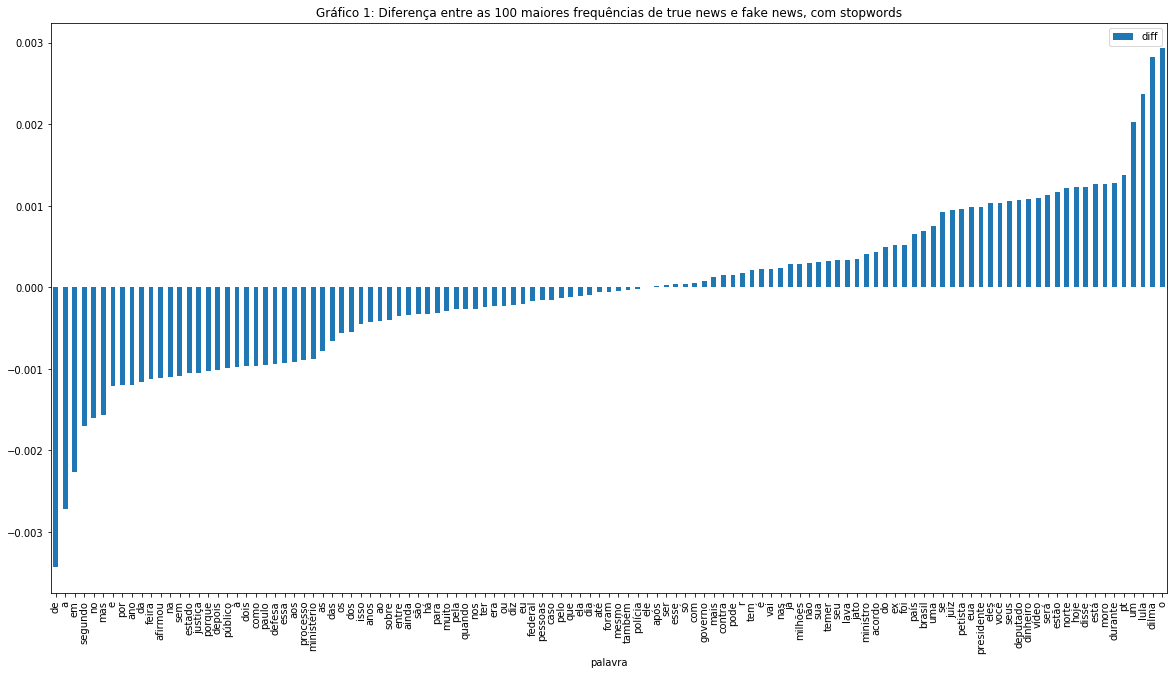

In [88]:
ax = df.plot.bar(x='palavra', y='diff', rot=90)
fig = plt.gcf()
fig.set_size_inches(20, 10.5)
plt.title("Gráfico 1: Diferença entre as 100 maiores frequências de true news e fake news, com stopwords")

Text(0.5, 1.0, 'Gráfico 2: Diferença entre as 100 maiores frequências de true news e fake news, sem stopwords')

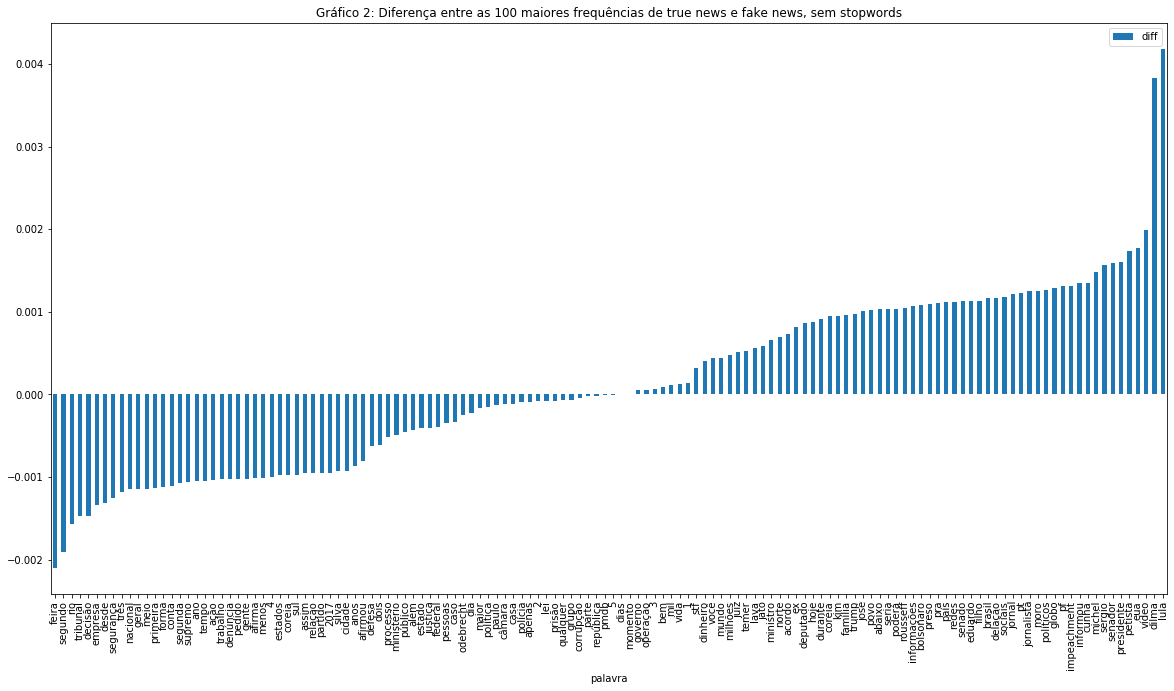

In [89]:
ax = df1.plot.bar(x='palavra', y='diff', rot=90)
fig = plt.gcf()
fig.set_size_inches(20, 10.5)
plt.title("Gráfico 2: Diferença entre as 100 maiores frequências de true news e fake news, sem stopwords")

A análise deve ser feita da seguinte forma: palavras mais à direita, com frequência negativa, são palavras que aparecem mais em notícias verdadeiras. Já palavras mais à esquerda do gráfico (frequência positiva) são palavras que aparecem mais em fake news.

Pode-se ver nos gráficos que a frequência de citações de pessoas, principalmente às relacionadas ao PT, é muito maior em notícias falsas do que em notícias verdadeiras.

Além disso, nas fakes news observa-se maior informalidade. Um exemplo é o uso da sigla STF ao invés de Supremo Tribunal Federal.

Também observa-se no gráfico 1 o uso de pronomes possessivos, que são mais frequentes nas fake news do que nas notícias verdadeiras.

É possível ver que há uma identificação de grupos nas fake news. Palavras como "petista", "jornalista", "globo", "STF" e "políticos" costumam aparecer nos discursos do atual presidente, Jair Bolsonaro.

Por fim, as palavras mais à esquerda são, em sua maioria, temas vinculados à atual presidência, enquanto à direita há uma maior objetividade e diversidade de tópicos.